<a href="https://colab.research.google.com/github/aishananaraji/arbitrary/blob/main/Natural_Language_Processing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download IMDB to current folder
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# Unzip
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsup removed as unlabeled
!rm -rf aclImdb/train/unsup
# Show IMDB dataset description
!cat aclImdb/README


--2024-07-27 23:15:36--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  11.5MB/s    in 8.1s    

2024-07-27 23:15:44 (9.88 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

In [ ]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

# Display of correspondence between 0,1 and meaning of label
print(train_review.target_names)

['neg', 'pos']


In [ ]:
print("x : {}".format(x_train[0]))


x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [ ]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()

# Putting it all together in a DataFrame
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())
display(df)


,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [ ]:
# Specify the range of n-grams to be used with ngram_range
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)


,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


In [ ]:

vectorizer = CountVectorizer(ngram_range=(2, 2),stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,a good,bad very,film a,movie very,this film,this movie,very bad,very good,very very
0,0,0,0,1,0,1,0,1,0
1,1,0,1,0,1,0,0,0,0
2,0,1,0,0,0,0,2,0,1


In [ ]:
# Download Stopword for first time use
import nltk
stop_words = nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


In [ ]:
first_sentence = "This movie is SOOOO funny!!!".lower().replace("!","").split()
second_sentence = "What a movie! I never".lower().replace("!","").split()
third_sentence = "best movie ever!!!!! this movie".lower().replace("!","").split()


In [ ]:
gram1_featurename = first_sentence+second_sentence+third_sentence


In [ ]:
import numpy as np

gram_1 = pd.DataFrame(np.zeros((3, (len(set(gram1_featurename))))).astype('int'), columns=list(set(gram1_featurename)))

for i, ss in enumerate([first_sentence, second_sentence, third_sentence]):
  for s in ss:
    n = ss.count(s)
    gram_1[s][i]=n
gram_1

,never,i,is,this,a,best,soooo,what,movie,funny,ever
0,0,0,1,1,0,0,1,0,1,1,0
1,1,1,0,0,1,0,0,1,1,0,0
2,0,0,0,1,0,1,0,0,2,0,1


In [ ]:
gram2_feature_names = []
gram2_sentences =[]
for i, s in enumerate([first_sentence, second_sentence, third_sentence]):
  sentence = []
  for ss in range(len(s)-1):
    gram2_feature_names.append(s[ss]+" "+s[ss+1])
    sentence.append(s[ss]+" "+s[ss+1])
  gram2_sentences.append(sentence)

In [ ]:
gram_2 = pd.DataFrame(np.zeros((3, (len(set(gram2_feature_names))))).astype('int'), columns=list(set(gram2_feature_names)))

for i, ss in enumerate(gram2_sentences):
  for s in ss:
    n = ss.count(s)
    gram_2[s][i]=n
gram_2

,movie i,best movie,what a,this movie,ever this,i never,is soooo,movie ever,movie is,a movie,soooo funny
0,0,0,0,1,0,0,1,0,1,0,1
1,1,0,1,0,0,1,0,0,0,1,0
2,0,1,0,1,1,0,0,1,0,0,0


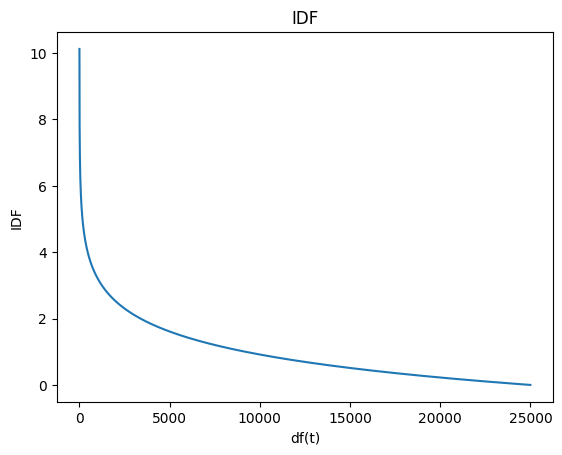

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = stop_words, max_features = 5000)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.fit_transform(x_test)

In [ ]:
print(x_train.shape, x_test.shape)

(25000, 5000) (25000, 5000)


##PROBLEM 3 LEARNING USING TFIDF

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score

lgbm_clf = LGBMClassifier().fit(x_train, y_train)
y_pred = lgbm_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 12500, number of negative: 12500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.663793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 445520
[LightGBM] [Info] Number of data points in the train set: 25000, number of used features: 4998
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
0.57248


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training Logistic Regression classifier
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

# Predictions
y_pred = logistic_reg.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5566


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined from the previous example

# Training SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)

# Predictions
y_pred = svm_classifier.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.54788


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

[[7536 4964]
 [6339 6161]]
0.5537977528089888
0.49288


##PROBLEM 4 SCRATCH MOUNTING OF TFIDF

In [ ]:
tf = gram_1.copy()
idf = gram_1.copy()
for i in range (len(tf)):
  tf.iloc[i, :] = tf.iloc[i, :] / tf.iloc[i, :].sum()
  for t in idf.columns:
    idf[t][:]=np.log(len(idf.columns)/idf[t].sum())

<ipython-input-22-d2a514e2f1a1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf[t][:]=np.log(len(idf.columns)/idf[t].sum())
<ipython-input-22-d2a514e2f1a1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf[t][:]=np.log(len(idf.columns)/idf[t].sum())
<ipython-input-22-d2a514e2f1a1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf[t][:]=np.log(len(idf.columns)/idf[t].sum())
<ipython-input-22-d2a514e2f1a1>:6: SettingWithCopyWa

In [ ]:
tf

,never,i,is,this,a,best,soooo,what,movie,funny,ever
0,0.0,0.0,0.2,0.2,0.0,0.0,0.2,0.0,0.2,0.2,0.0
1,0.2,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.2,0.0,0.0
2,0.0,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.4,0.0,0.2


In [ ]:
idf

,never,i,is,this,a,best,soooo,what,movie,funny,ever
0,2.155675,2.155675,2.155675,1.566032,2.155675,2.155675,2.155675,2.155675,1.046387,2.155675,2.155675
1,2.155675,2.155675,2.155675,1.566032,2.155675,2.155675,2.155675,2.155675,1.046387,2.155675,2.155675
2,2.155675,2.155675,2.155675,1.566032,2.155675,2.155675,2.155675,2.155675,1.046387,2.155675,2.155675


In [ ]:
tf*idf

,never,i,is,this,a,best,soooo,what,movie,funny,ever
0,0.000000,0.000000,0.431135,0.313206,0.000000,0.000000,0.431135,0.000000,0.209277,0.431135,0.000000
1,0.431135,0.431135,0.000000,0.000000,0.431135,0.000000,0.000000,0.431135,0.209277,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.313206,0.000000,0.431135,0.000000,0.000000,0.418555,0.000000,0.431135


##WORD 2 VEC

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(sentences,min_count=1, vector_size=15)

print("Vocabulary List : {}".format(model.wv.index_to_key))

for vocab in model.wv.index_to_key:
  print("{} vector: \n{}".format(vocab, model.wv[vocab]))

Vocabulary List : ['very', 'bad', 'good', 'is', 'this', 'a', 'film', 'movie']
very vector: 
[-0.00357485  0.00157621  0.03402233  0.06006182 -0.06201966 -0.04744539
  0.04305915  0.05981992 -0.03343619 -0.02508914  0.04920336 -0.01022314
 -0.03024409  0.04369368 -0.03240107]
bad vector: 
[-0.01210678  0.0191772   0.00661249 -0.05523477 -0.06299212  0.04874511
  0.03380175  0.04505129  0.00508577  0.04233927 -0.02270244 -0.00630934
  0.03845716 -0.05014425 -0.02624069]
good vector: 
[-0.05007721 -0.00620028  0.06358746 -0.04879444 -0.01555846 -0.01291827
  0.05384958 -0.0395393   0.00030108 -0.03169156 -0.06402367  0.03338195
 -0.05839724 -0.02927884 -0.000234  ]
is vector: 
[-0.00197456 -0.05107525  0.06409869  0.03321393  0.06155467 -0.05438646
  0.02997218 -0.02758068  0.00549694  0.05665782 -0.02974803  0.03011686
 -0.04524669 -0.02365674  0.06265712]
this vector: 
[-0.01051768  0.00214248 -0.0276042  -0.05121792 -0.01005339  0.0164653
 -0.00592018  0.03689108 -0.01828652  0.0150671

In [ ]:
model.wv.most_similar(positive='good', topn=3)

[('is', 0.37519174814224243),
 ('a', 0.23854228854179382),
 ('bad', 0.14096243679523468)]

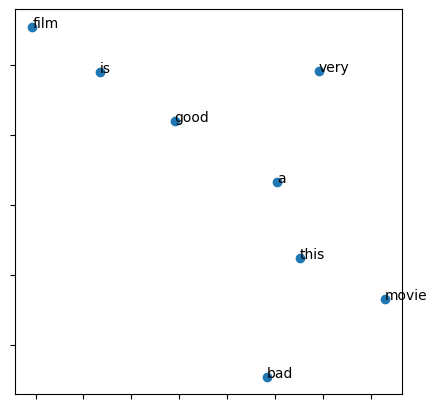

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocabs = model.wv.index_to_key

tsne_model = TSNE(perplexity=1, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model.wv[vocabs])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

#Problem 5] Pre-processing of corpus

In [ ]:
from gensim.models import Word2Vec

# Convert csr_matrix to a list of sentences
x_train_sentences = []
for row in x_train:
    sentence = [str(word_index) for word_index in row.indices] # Assuming word indices are used in the matrix
    x_train_sentences.append(sentence)

# Initialize Word2Vec model
model_2 = Word2Vec(min_count=1, vector_size=10)

# Build vocabulary from training data
model_2.build_vocab(x_train_sentences) # Pass the list of sentences

# Train Word2Vec model
model_2.train(x_train_sentences, total_examples=model_2.corpus_count, epochs=model_2.epochs)


(9698007, 9998235)

In [ ]:
with_url = 0
for i, s in enumerate(x_train):
    # Convert the sparse matrix row to a list of non-zero elements
    row_elements = s.toarray().flatten().tolist()  # Convert to a dense array and then flatten to a list
    # Convert each element to a string before joining
    if 'www' in ''.join([str(element) for element in row_elements]):  # Now you can use 'in' operator on a string
        with_url = i
        print(row_elements)
        break


#Problem 6: Learning Word2Vec

In [ ]:
from gensim.models import Word2Vec

# Sample corpus
sentences = [
    ["the", "cat", "sits", "on", "the", "mat"],
    ["the", "dog", "lays", "on", "the", "rug"],
    ["the", "bird", "flies", "in", "the", "sky"]
]

# Training the model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Getting the vector representation of a word
vector = model.wv['cat']

# Finding most similar words
similar_words = model.wv.most_similar('cat')

#[Problem 7] (Advance assignment) Vector Visualization

In [ ]:
# Select words to find similar words
selected_words = ['cat', 'dog', 'bird']

# Find similar words
for word in selected_words:
    similar_words = model.wv.most_similar(word)
    print(f"Words similar to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"{similar_word}: {similarity:.4f}")
    print()


Words similar to 'cat':
sky: 0.1727
bird: 0.1669
lays: 0.1112
sits: 0.1094
the: 0.0796
in: 0.0413
dog: 0.0377
on: 0.0083
flies: -0.0059
mat: -0.0742

Words similar to 'dog':
sky: 0.1991
in: 0.0750
bird: 0.0606
mat: 0.0447
cat: 0.0377
on: 0.0336
the: 0.0271
sits: 0.0268
rug: 0.0088
flies: -0.0690

Words similar to 'bird':
cat: 0.1669
flies: 0.1389
in: 0.1315
sky: 0.0641
dog: 0.0606
sits: 0.0200
rug: 0.0192
on: 0.0094
lays: -0.0577
the: -0.0599



In [ ]:
pip install gensim scikit-learn tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset
max_features = 20000  # Number of words to consider as features
max_len = 100  # Cut texts after this number of words (among top max_features most common words)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to the same length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
from gensim.models import Word2Vec

# Convert sequences back to words
word_index = imdb.get_word_index()
index_word = {v: k for k, v in word_index.items()}

sentences = [[index_word.get(i - 3, '?') for i in review if i >= 3] for review in x_train]

# Train Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
def get_average_word2vec(words, model, vocab, num_features):
    feature_vec = np.zeros((num_features,), dtype="float32")
    n_words = 0

    for word in words:
        if word in vocab:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])

    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)

    return feature_vec

def get_avg_feature_vecs(reviews, model, num_features):
    vocab = set(model.wv.index_to_key)
    review_feature_vecs = np.zeros((len(reviews), num_features), dtype="float32")

    for i, review in enumerate(reviews):
        review_feature_vecs[i] = get_average_word2vec(review, model.wv, vocab, num_features)

    return review_feature_vecs

# Convert training and test reviews to feature vectors
num_features = 100
train_data_vecs = get_avg_feature_vecs(sentences, w2v_model, num_features)

test_sentences = [[index_word.get(i - 3, '?') for i in review if i >= 3] for review in x_test]
test_data_vecs = get_avg_feature_vecs(test_sentences, w2v_model, num_features)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train a classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(train_data_vecs, y_train)

# Predict sentiment for test data
y_pred = classifier.predict(test_data_vecs)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7873
